# Signatures

In [1]:
import time
from pylayers.gis.layout import *
from pylayers.antprop.signature import *
from pylayers.antprop.rays import *
L = Layout()

The example here is doen with the default Layout

In [2]:
L


----------------
defstr3.ini
Image('/private/staff/i/bi/mmhedhbi/Bureau/P1/struc/images/TA-Office.png')
----------------

Number of points  : 8
Number of segments  : 9
Number of sub segments  : 3
Number of cycles  : 0
Number of rooms  : 0
degree 0 : []
degree 1 : [-8 -7]
degree 2 : 4
degree 3 : 2

xrange :(758.49, 768.516)
yrange :(1111.9, 1115.963)

Useful dictionnaries
----------------
sl {slab name : slab dictionary}
name :  {slab :seglist} 

Useful arrays
----------------
tsg : get segment index in Gs from tahe
tgs : get segment index in tahe from Gs
lsss : list of segments with sub-segment
sla : associated slab name
stridess : stride for adressing sub segment 
degree : degree of nodes 


In [3]:
L.build()

Showing the graph of room with 2 rooms separated by a DOOR segment 

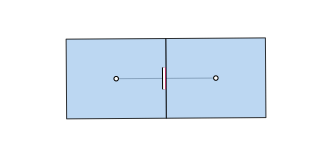

In [4]:
L.showG('r')
a=plt.axis('off')

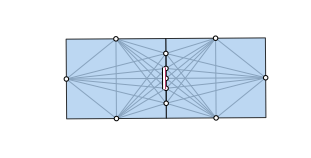

In [5]:
L.showG('v')
a=plt.axis('off')

The graph of interactions is shown below. 

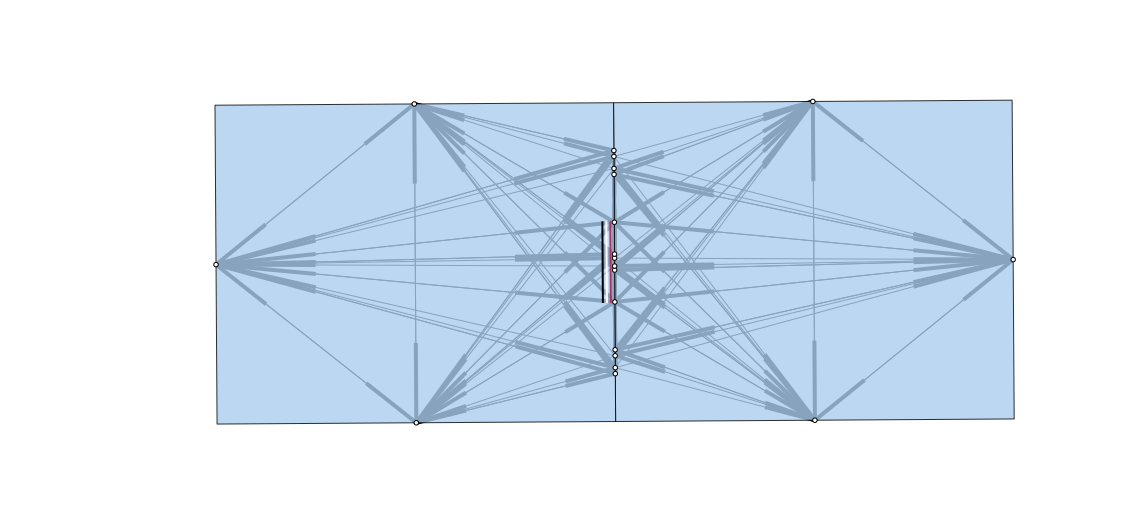

In [6]:
L.showG('i',figsize=(20,20))
a=plt.axis('off')

All the interactions of a given cycle are stored as meta information in nodes of `Gt` 

In [19]:
L.Gt.node[0]['inter']

['(8, 0)',
 '(8, 0, 1)',
 '(8, 1, 0)',
 '(9, 0)',
 '(9, 0, 1)',
 '(9, 1, 0)',
 '(7, 0)',
 '(7, 0, 1)',
 '(7, 1, 0)',
 '(5, 0)',
 '(6, 0)',
 '(1, 0)']

The signature is calculated from a Layout ant two cycles number. Here 0 and 1. 

In [20]:
Si = Signatures(L,0,1)

In [21]:
Si.run1(cutoff=1)

An exhaustive search of signatures when no prior information is given is a combinatory hard problem. 
The number of signatures grows exponentially with the cutoff parameter. 

In [22]:
Si

Signatures
----------
from cycle : 0 to cycle 1
1 : 3
   [8 9 7]
   [2 2 2]
2 : 18
   [8 8 8 9 9 9 7 7 7 5 5 5 6 6 6 1 1 1]
   [2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1]
   [3 4 2 3 4 2 3 4 2 7 9 8 7 9 8 7 9 8]
   [1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


In [41]:
L.Gt.pos

{0: (2.5, 0.0), 1: (7.5, 0.0)}

In [39]:
ptx = np.array(L.Gt.pos[0])+np.random.rand(2)
prx = np.array(L.Gt.pos[1])+np.random.rand(2)
print ptx
print prx

[ 2.66452735  0.95942216]
[ 7.63874254  0.48737   ]


Evaluate performances of signature and ray evaluation

In [40]:
tt1 = {}
tt2 = {}
tint={}
tsig={} # number of sig
tray={} # number of rays
maxcutoff=11
for cutoff in range(maxcutoff):
     del Si
        
     Si = Signatures(L,0,1)
     tic1=time.time()
     Si.run1(cutoff=cutoff)
     tic2=time.time()
     r2d = Si.rays(ptx,prx)   
     tic3=time.time()
     Si.num()   
     Nr = len(r2d)   
     tt1[cutoff]=tic2-tic1
     tt2[cutoff]=tic3-tic2   
     tint[cutoff]=Si.nint   
     tsig[cutoff]=Si.nsig
     tray[cutoff]=Nr
     print cutoff,tt2[cutoff]
#    L.display['ednodes']=False
#    r2d.show(L)

0 0.00288796424866
1 0.0189950466156
2 0.0611169338226
3 0.205785989761
4 0.655408143997
5 1.77826786041
6 4.4461388588
7 9.24612212181
8 15.9442989826
9 21.6005988121
10 25.4200348854


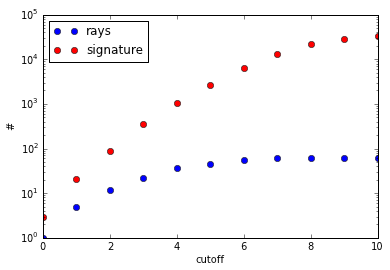

In [42]:
p1=semilogy(tt1.keys(),tray.values(),'ob')
p2=semilogy(tt1.keys(),tsig.values(),'or')
legend((p1[0],p2[0]),('rays','signature'),loc='best')
xlabel('cutoff')
ylabel('#')

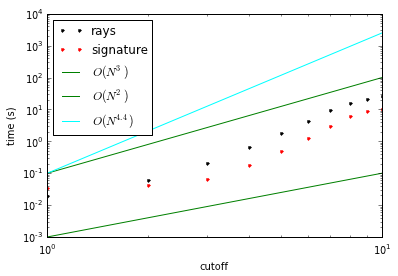

In [43]:
#b1=bar(tt2.keys(),tt2.values(),color='red')
#b2=bar(tt1.keys(),tt1.values(),color='blue')
#b1=semilogx(tt2.keys(),log10(tt2.values()),color='red')
#b2=semilogx(tt1.keys(),log10(tt1.values()),color='blue')
#b3=semilogx(tt1.keys(),log10(0.1*(arange(10))**3),color='green')
b1=loglog(tt2.keys(),tt2.values(),'k.')
b2=loglog(tt1.keys(),tt1.values(),'r.')
b3=loglog(tt1.keys(),0.1*arange(maxcutoff)**3,color='green')
b4=loglog(tt1.keys(),0.001*arange(maxcutoff)**2,color='green')
b5=loglog(tt1.keys(),0.1*arange(maxcutoff)**4.4,color='cyan')
legend((b1[0],b2[0],b3[0],b4[0],b5[0]),('rays','signature',r'$O(N^3)$',r'$O(N^2)$',r'$O(N^{4.4})$'),loc='best')
xlabel('cutoff')
ylabel('time (s)')

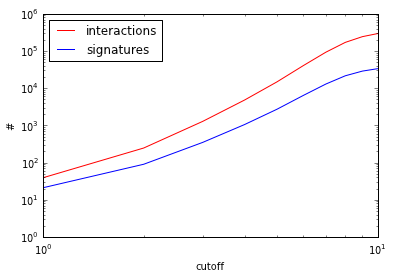

In [44]:
b1=loglog(tt2.keys(),tint.values(),color='red')
b2=loglog(tt1.keys(),tsig.values(),color='blue')
#b3=loglog(tt1.keys(),arange(maxcutoff)**3,color='green')
#b4=loglog(tt1.keys(),arange(maxcutoff)**2,color='green')
#legend((b1[0],b2[0],b3[0],b4[0]),('interactions','signatures',r'$O(N^3)$',r'$O(N^2)$'),loc='best')
legend((b1[0],b2[0]),('interactions','signatures'),loc='best')
xlabel('cutoff')
ylabel('#')

Temps dans rays en fonction du nombre d'interactions

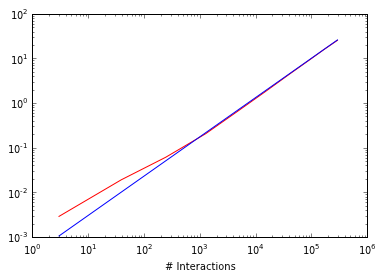

In [45]:
#b1=loglog(tsig.values(),tt1.values(),color='red')
b2=loglog(tint.values(),tt2.values(),color='red')
b3=loglog(tint.values(),0.0004*array(tint.values())**0.88,color='blue')
xlabel('# Interactions')

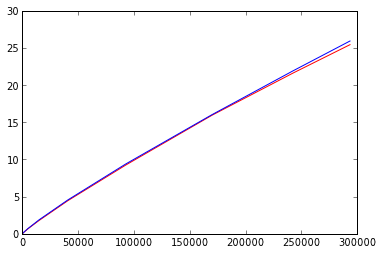

In [46]:
plot(tint.values(),tt2.values(),color='red')
plot(tint.values(),0.0004*array(tint.values())**0.88,color='blue')

The computation time in rays grows exponentially with the number of interactions.

$$T_{rays}=\alpha N_i^{0.88} [s]$$

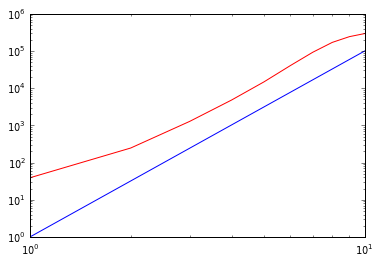

In [47]:
b1=loglog(tt2.keys(),tint.values(),color='red')
b2=loglog(tt2.keys(),array(tt2.keys())**5,color='blue')

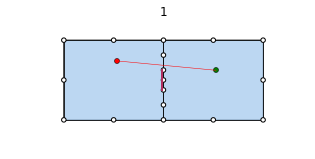

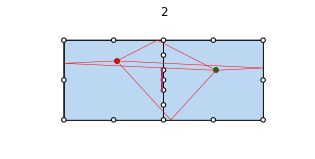

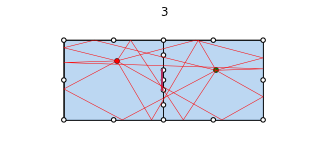

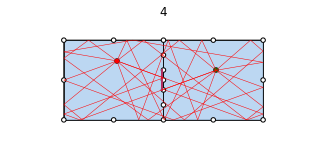

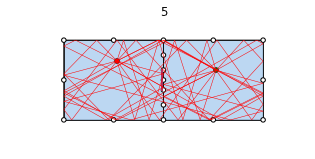

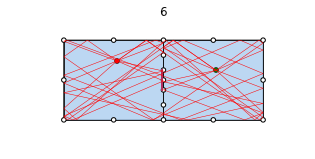

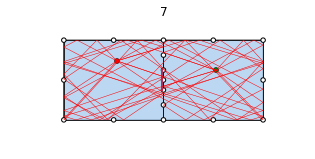

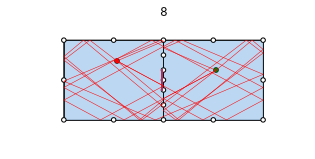

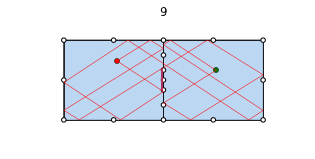

In [48]:
for k in range(9):
    r2d.show(L,i=k+1,colray='red',widthray=0.5)
    title(str(k+1))

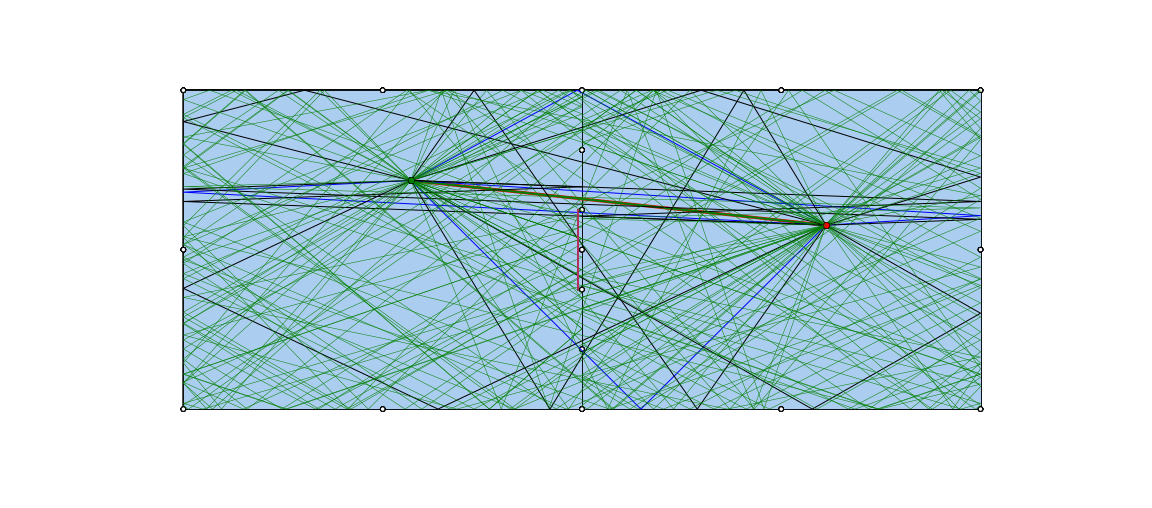

In [77]:
fig,ax=r2d.show(L,i=1,figsize=(20,10),colray='red',widthray=3)
fig,ax=r2d.show(L,i=1,colray='green',widthray=2,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=2,colray='blue',widthray=1,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=3,colray='black',widthray=1,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=4,colray='green',widthray=0.5,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=5,colray='green',widthray=0.5,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=6,colray='green',widthray=0.5,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=7,colray='green',widthray=0.5,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=8,colray='green',widthray=0.5,fig=fig,ax=ax)
fig,ax=r2d.show(L,i=9,colray='green',widthray=0.5,fig=fig,ax=ax)
fig.savefig('toto.pdf')

Une interaction de type réflexion se connecte aux segments voisins de son segment propre dans son cycle.
Si le segment voisin a deux cycles on ajoute également la transmission vers le cycle adjascent. 

In [49]:
len(r2d)

62

In [50]:
np.shape(r2d[4]['sig'])

(2, 4, 10)

In [51]:
r2d[4]['sig']

array([[[8, 9, 9, 5, 5, 5, 6, 6, 6, 1],
        [2, 3, 6, 6, 7, 8, 5, 8, 1, 7],
        [3, 2, 1, 1, 2, 2, 7, 2, 7, 4],
        [4, 9, 9, 8, 3, 4, 3, 3, 4, 2]],

       [[2, 2, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 2, 2, 1, 2, 1, 2],
        [1, 1, 1, 1, 1, 1, 2, 1, 2, 1],
        [1, 1, 2, 2, 1, 1, 1, 1, 1, 1]]])

In [52]:
Si

Signatures
----------
from cycle : 0 to cycle 1
1 : 3
   [8 9 7]
   [2 2 2]
2 : 18
   [8 8 8 9 9 9 7 7 7 5 5 5 6 6 6 1 1 1]
   [2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1]
   [3 4 2 3 4 2 3 4 2 7 9 8 7 9 8 7 9 8]
   [1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
3 : 69
   [8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 7 7 7 7 7 7 7 8 8 9 9 9 7 7 5 5 5 5 5 5 5
 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1]
   [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
   [4 2 3 2 3 3 4 4 2 3 2 3 3 3 3 4 4 2 2 3 3 3 4 6 6 6 6 6 6 6 1 1 6 1 6 9 7
 8 7 9 7 8 1 5 1 5 1 5 9 7 8 9 7 8 9 7 8 5 6 5 6 5 9 7 8 9 7 8 8]
   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2]
   [3 3 4 4 7 9 2 3 3 4 4 7 9 8 2 2 3 3 4 9 8 2 2 7 9 7 9 8 9 8 7 9 9 8 8 3 3
 3 4 2 2 2 7 7 9 9 8 8 3 3 3 4 4 4 2 2 2 7 7 9 9 8 3 3 3 4 4 4 2]
   [1 1 1 1 1 1 1 1 1 1 1 

In [53]:
len(r2d)

62

In [54]:
len(r2d)

62

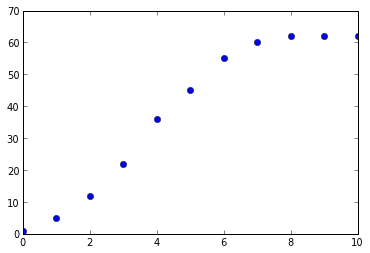

In [55]:
plot(tray.values(),'o')

In [56]:
tray

{0: 1, 1: 5, 2: 12, 3: 22, 4: 36, 5: 45, 6: 55, 7: 60, 8: 62, 9: 62, 10: 62}

In [57]:
tsig

{0: 3,
 1: 21,
 2: 90,
 3: 348,
 4: 1049,
 5: 2709,
 6: 6401,
 7: 12905,
 8: 21497,
 9: 28741,
 10: 33387}

In [58]:
r2d[9]

{'pt': array([[[  5.        ,   4.33813002],
        [  2.84852438,   5.        ],
        [  0.        ,   0.        ],
        [  3.21610313,   0.77148888],
        [  5.        ,   5.        ],
        [  9.28073064,   7.20484774],
        [ 10.        ,  10.        ],
        [  5.        ,   6.36179341],
        [  5.34535816,   5.        ]],

       [[ -0.58096768,   2.        ],
        [ -2.        ,   1.58847626],
        [ -0.12122055,  -1.5203197 ],
        [  2.        ,  -2.        ],
        [  0.82340878,   0.62911566],
        [ -2.        ,   2.        ],
        [ -1.52559701,   0.26208839],
        [  1.77221476,  -2.        ],
        [  2.        ,  -1.15329243]],

       [[  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
        [  0.        ,   0.        ],
 